## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: NA
    - Email: NA
- Group member 2
    - Name: NA
    - Email: NA
- Group member 3
    - Name: NA
    - Email: NA
- Group member 4
    - Name: NA
    - Email: NA

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

# Assignment group 2: Network and exploratory data analysis

## Module B _(64 pts)_ Data Visualization and Interpretation
We have two goals for this exercise:
    
1. Summarization through measures of commonality, centrality, variation, association, and regularity.
2. Visualization through succicnt and intuitive representations that allow you to see all of the data.
    
The dataset we will be using is Philly's employees salary Dataset:

- https://www.opendataphilly.org/dataset/employee-salaries-overtime/resource/e97432a2-a6a7-466e-9025-32a1da4b14e5

also packaged in the assignment's data directory for conveniience:

```
./data/employee_salaries.csv
```

We will be using some native `pandas` and `matplotlib` to summarize and visualize the dataset. Some of the questions expect you to review the lecture notes. There are also some new methods and techniques introduced in this Module. Please feel free to be creative when answering the questions.

### Note on hypothesis generation
We'll start looking at univariate distribution of the columns to understand what is in our dataset, and eventually use biavariate and multivariate analysis to explore existing hypotheses. However, in some instances it's the new hypotheses that arise from these visualizations that are the most insightful!

So, as you answer the questions and create visualizations, please make a note any hypotheses or conclusions you can draw from your observations. These visualization methods not only help you understand what is in your data, but also become initial insights in determining the existing relationships that exist between attributes in the data.

__B1.__ _(2 pts)_ To start, write a function called `read_salaries`, which takes a string argument called `path_to_salaries_json` that contains the path to a json file containing salaries data and loads the dataset with `pandas` into a dataframe.

In [1]:
#B1:Function(2/2)

import pandas as pd

def read_salaries(path_to_salaries_csv):
    
    #--- Your code starts here
    df = pd.read_csv(path_to_salaries_csv)
    
    #--- Your code ends here
    
    return df


To test your function, let's provide it with the path to the `employee_salaries.csv` data and print its `.head()`.

Your output should look like this:

```
   objectid  calendar_year  quarter   last_name first_name  \
0         1           2016        1  CHILIBERTI   ROSEMARY   
1         2           2016        1       SMITH       KARI   
2         3           2016        1   BRUMSKILL     SANDRA   
3         4           2016        1   ALEXANDER   KHADEJAH   
4         5           2016        1        HILL       SEAN   

                              title                  department  \
0                ADM TECHNICIAN III          COMMON PLEAS COURT   
1                 SENIOR CREW CHIEF  MANAGING DIRECTOR'S OFFICE   
2             SCHOOL CROSSING GUARD           POLICE DEPARTMENT   
3  CLERK TEMPORARY-SUMMER-$7.00/HR.          COMMON PLEAS COURT   
4               PROBATION OFFICER 2          COMMON PLEAS COURT   

   annual_salary  ytd_overtime_gross  
0        50543.0                 0.0  
1        34842.0                 0.0  
2            0.0                 0.0  
3            0.0                 0.0  
4        56206.0                 0.0  
```

In [2]:
# B1:SanityCheck

df = read_salaries("/Users/rishabhsharma/Documents/GitHub/winter-23/DSCI-521/assignment2/module-B/data/employee_salaries.csv")
print(df.head())

   objectid  calendar_year  quarter   last_name first_name  \
0         1           2016        1  CHILIBERTI   ROSEMARY   
1         2           2016        1       SMITH       KARI   
2         3           2016        1   BRUMSKILL     SANDRA   
3         4           2016        1   ALEXANDER   KHADEJAH   
4         5           2016        1        HILL       SEAN   

                              title                  department  \
0                ADM TECHNICIAN III          COMMON PLEAS COURT   
1                 SENIOR CREW CHIEF  MANAGING DIRECTOR'S OFFICE   
2             SCHOOL CROSSING GUARD           POLICE DEPARTMENT   
3  CLERK TEMPORARY-SUMMER-$7.00/HR.          COMMON PLEAS COURT   
4               PROBATION OFFICER 2          COMMON PLEAS COURT   

   annual_salary  ytd_overtime_gross  
0        50543.0                 0.0  
1        34842.0                 0.0  
2            0.0                 0.0  
3            0.0                 0.0  
4        56206.0             

__B2.__ _(3 pts)_ Determine and print 1) the number of times each year is represented by the dataset.

In [3]:
# B2:Inline(2/3)

# return the number of times each year is represented in the dataset

#--- Your code starts here
df['calendar_year'].value_counts()

#--- Your code ends here

2017    125399
2016    123218
2018     95528
Name: calendar_year, dtype: int64

In [4]:
# B2:Inline(1/3)

# look at the number of time each year was represented in the dataset
# and determine which year is most abundantly present
# Print your answer as "2016", "2017", or "2018"
print("2017")

2017


__B3.__ _(2 pts)_ For this assignment, we will restrict to five departments with some of the highest number of employees, but they should be more or less of the same scale to get started. Since the Police Department has three times as many as the other top 6 departments, we'll ignore them (the Police) for now. 

So, write a function called `get_top5_nonpolice` stores the top 2&ndash;6 `department` strings in a `list` called `top5_nonpolice`.

In [5]:
#B3:Function(2/2)

def get_top5_nonpolice(df):
    
    #--- Your code starts here
    top5_nonpolice = list(df['department'].value_counts().head(6)[1:6].index)
    
    #--- Your code ends here
    
    return top5_nonpolice

Your output should look like this:

```
['COMMON PLEAS COURT', 'FIRE DEPARTMENT', 'PHILA. PRISONS', 'WATER DEPARTMENT', 'RECREATION DEPARTMENT']
```

In [6]:
#B3:SanityCheck
departments = get_top5_nonpolice(df)
print(departments)

['COMMON PLEAS COURT', 'FIRE DEPARTMENT', 'PHILA. PRISONS', 'WATER DEPARTMENT', 'RECREATION DEPARTMENT']


__B4.__ _(3 pts)_ Next, restrict the data to just those rows corresponding to the departments determined in __B3__ and exhibit how the data have been restricted to just these.

Your output should look like:

```
COMMON PLEAS COURT       28081
FIRE DEPARTMENT          28011
PHILA. PRISONS           24838
WATER DEPARTMENT         23566
RECREATION DEPARTMENT    21269
Name: department, dtype: int64
```

[Hint. use your `departments` to create a boolean mask for the rows.]

In [7]:
# B4:Inline(2/3)

#--- Your code starts here
df = df[df['department'].isin(departments)]

#--- Your code ends here

#check to see if we have it right
print (df['department'].value_counts())

COMMON PLEAS COURT       28081
FIRE DEPARTMENT          28011
PHILA. PRISONS           24838
WATER DEPARTMENT         23566
RECREATION DEPARTMENT    21269
Name: department, dtype: int64


In [8]:
# B2:Inline(1/3)

# look at the number of employees in each of these departments
# and determine which department has the least employees:
# Print your answer as "Fire", "Water", or "Recreation"
print("Recreation")

Recreation


__B5.__ _(5 pts)_ For our analysis, it may be interesting to have knowledge of employee gender, but these data are not a part of those distributed. So, download the `gender_guesser` module using your package manager of choice, e.g.:
```
>>> pip install gender_guesser
```
This module predicts gender based on first name&mdash;read up more about this package (see https://pypi.org/project/gender-guesser/), it can be very useful for feature engineering!

Once you've accessed the package's contents, complete the `add_gender_column(df)` function, below. In particular, initialize the `gender_guesser.detector.Detector()` class for case insensitivity (`case_sensitive=False`), and apply the resulting instance's `.get_gender()` method to the `'first_name'` column of the assignment data and combine the `'male'` with `'mostly male'` and `'female'` with the `'mostly female'` output in a new column called `'gender'`.

In [9]:
# B5:Function(3/5)

import gender_guesser.detector as gender

def add_gender_column(df):
    
    #--- Your code starts here
    g = gender.Detector(case_sensitive=False)
    df['gender'] = df['first_name'].apply(lambda x: g.get_gender(x)).replace({'male': 'male', 'mostly_male': 'male', 'femal':'femal','mostly_female': 'female'})
    df = df[df['gender']!= 'unknown']

    
    #--- Your code ends here
    
    return df

For reference, your output should look like:

```
  first_name  gender
0   ROSEMARY  female
4       SEAN    male
6      LINDA  female
8      JAMES    male
9      LOUIS    male
```

In [10]:
# B5:SanityCheck

df = add_gender_column(df)
print(df[['first_name', 'gender']].head())

  first_name  gender
0   ROSEMARY  female
4       SEAN    male
6      LINDA  female
8      JAMES    male
9      LOUIS    male


When this is all complete, fill in the `percentages` object with the percent of the dataset now labeled `'male'` and `'female'`, respectively. For reference, your output should look like:

```
male:  66.95450830836285
female:  33.04549169163715
```

In [11]:
# B5:Inline(2/5)

percentages = {'male': 0., 'female': 0.}

#--- Your code starts here

percentages = df['gender'].value_counts()/df.shape[0]*100

#--- Your code ends here

print('male: ', percentages['male'] )
print('female: ', percentages['female'])

male:  66.53762858689767
female:  32.84064248330626


__B6.__ _(2 pts)_ Here, your job is to calculate the distribution of qaurters, i.e., the percentge of the remaining data that fall into the four different values held by the `quarter` column. You should be able to answer if each value actually makes up a 'quarter' of the data, and for reference your output should look like:

```
1:  26.34159629528739
2:  27.29047489330791
3:  28.56260782711341
4:  17.805320984291292
```

\[Hint. You can take a quick look at the distribution by using `.value_counts()` method. This could also be helpful for part __B4__!\]

In [12]:
# B6:Inline(2/2)

quarter_percentages = {1: 0., 2: 0., 3: 0., 4: 0.}

#--- Your code starts here
quarter_percentages = df['quarter'].value_counts()/df.shape[0]*100

#--- Your code stops here

print ("1: ", quarter_percentages[1])
print ("2: ", quarter_percentages[2])
print ("3: ", quarter_percentages[3])
print ("4: ", quarter_percentages[4])

1:  26.343620285147086
2:  27.287493232268545
3:  28.561631474463095
4:  17.807255008121277


__B7.__ _(7 pts)_ Now, write a function called `barplot(df, column, title, top = 5)`, designed to take a `column` name from the dataframe `df` corresponding to a _categorical_ variable, like `'department'`. This function should create a bar plot for the specified `column`. Make sure your graphs have the proper axis labels and `title` considering of the specified `column`.

__Important.__ The `top` argument specifies the number of `top` ocurring categories to display on the bar plot. This makes it possible to select how much of the distribution to observe!

\[Hint. Use the dataframe `.value_counts()` and `.head()` methods for convenience!\]

In [13]:
# B7:Function(5/7)

import matplotlib.pyplot as plt

def barplot(df, column, title, top = 5):
    
    ## It's width by height, so let's make this one wide!
    fig = plt.figure(figsize = (8, 4))

    #--- Your code starts here
    count = df[column].value_counts().head(top)
    x = count.index
    y = count.values

    _= plt.bar(x, y)
    
    #--- Your code ends here

    ## Set the tick and label fontsize
    plt.tick_params(labelsize = 15)

    ## Set the title
    _ = plt.title(title, fontsize = 15)

    ## Set the x,y-labels
    _ = plt.xticks(rotation = 'vertical', fontsize = 13)
    _ = plt.ylabel("Number of employees", fontsize = 13)
    
    return fig

When this is complete, test your function's ability on the `'title'` column of the dataset. The resulting figure should look like this:

![Expected Output](img/b7-expected-output.png)

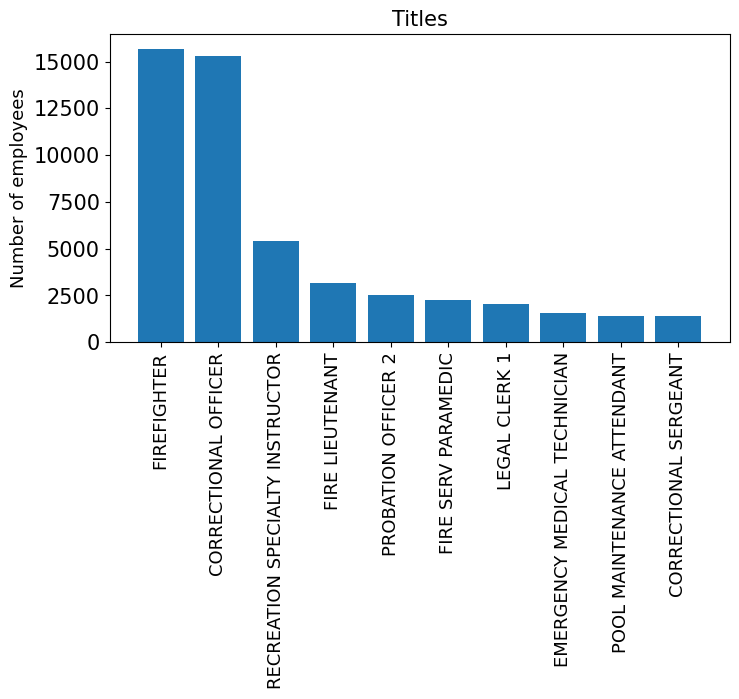

In [14]:
# B7:SanityCheck

fig = barplot(df, 'title', "Titles", top = 10)

In [15]:
# B7:Inline(2/7)

# Which position title was more abundant:
# Correctional Officer or Sergeant?
print("Officer")

Officer


__B8.__ _(5 pts)_ Here, we'll do the same thing but now for histograms and the numeric columns. In particular, write a function called `histogram(df, column, title)`, designed to take a `column` name from the dataframe `df` corresponding to a _numeric_ variable, like `'annual_salary'`. This function should create a histogram for the specified `column`. 

Make sure your graph uses `plt.title` on the `title` column in considering the specified `column`.

In [16]:
# B8:Function(3/5)

def histogram(df, column, title):
    ## It's width by height, so let's make this one wide!
    fig = plt.figure(figsize = (8, 4))

    #--- Your code starts here
    _= plt.hist(df[column])
    _= plt.title(title, fontsize = 15)
    
    #--- Your code ends here
    
    ## Set the tick and label fontsize
    plt.tick_params(labelsize = 15)

    ## Set the x,y-labels
    _ = plt.xticks(fontsize = 13)
    _ = plt.ylabel("Number of employees", fontsize = 13)
    
    return fig

When this is complete, exhibit your functions output on the `'annual_salary'` column. Your output should look like:

![Expected Output](img/b8-expected-output.png)

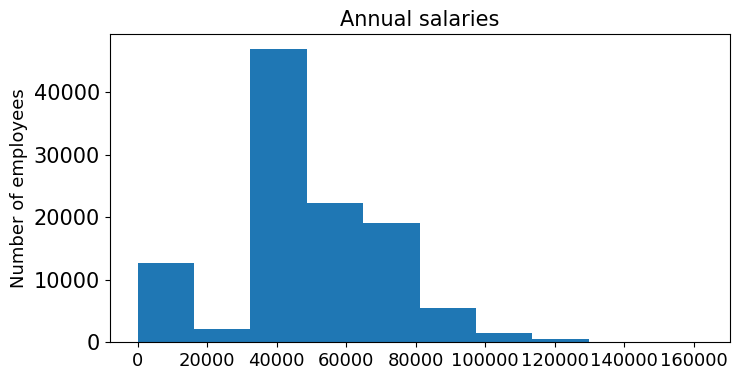

In [17]:
# B8:SanityCheck

fig = histogram(df, 'annual_salary', "Annual salaries")

In [18]:
# B8:Inline(2/5)

# Does $100,000 salary appear to be above or below 
# the distribution center, e.g., above or below the mean/median?
print("Above")

Above


__B9.__ _(2 pts)_ Next up, let's investigate the `"annual_salary"` column a bit further. Specifically, let's look at a boxplot of this column using `matplotlib.pyplot.plot.boxplot` as in the Chapter 3 notes. 

For reference, your output should look like:

![Expected Output](img/b9-expected-output.png)

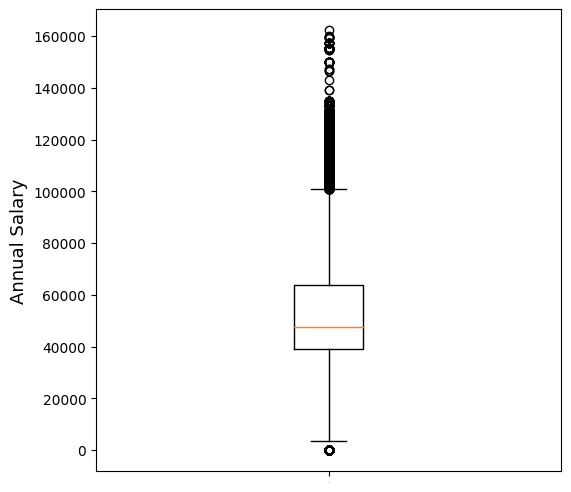

In [19]:
# B9:Inline(1/2)

fig = plt.figure(figsize = (6, 6))

#--- Your code starts here

_= plt.boxplot(df['annual_salary'])

#--- Your code ends ehre

_ = plt.ylabel("Annual Salary", fontsize = 13)
_ = plt.xlabel("", fontsize = 13)
_ = plt.xticks(fontsize = 0)

Now describe what you see!

In [20]:
# B9:Inline(1/2)

# Are there more high or low outliers in the distribution?
print("High")

High


__B10.__ _(3 pts)_ Now that we can see the outliers, use the `np.percentile()` function and boolean masks to identify which employees have _high_ outlier salaries. Supposing $IQR$ refers to the size of the interquartile range of this column, utilize the boxplot visualization's criterion for 'outlier':

- Outlier: a point that falls $1.5$ times an $IQR$ distance _above_ the 3rd quartile.


In [21]:
# B10:Inline(2/3)

import numpy as np

#--- Your code starts here
Q1, Q3 = np.percentile(df['annual_salary'], [25, 75])
IQR = Q3 - Q1
outlier_salaries = df['annual_salary'] > 1.5*IQR+Q3



#--- Your code ends here


When this is complete, use this boolean mask on the dataframe to print the `.head()` of our outlier employees and see what they do, earn, etc. For reference, your output should look like:

```
     first_name                                title  annual_salary  gender
125       GLENN             CHIEF COMPLIANCE OFFICER       116860.0    male
140    JEREMIAH                  DEPUTY COMMISSIONER       132911.0    male
287    ROSEANNE                              CHIEF 1       104575.0  female
295     MICHAEL        FIRE PARAMEDIC SERVICES CHIEF       106654.0    male
369       DAVID                  DEPUTY COMMISSIONER       127506.0    male
461     RICHARD        FIRE PARAMEDIC SERVICES CHIEF       106654.0    male
558      ROBERT           DEPUTY PRISON COMMISSIONER       121044.0    male
759     PATRICK                    FIRE DEPUTY CHIEF       117081.0    male
882     MICHAEL  WATER ENGINEERING ASSISTANT MANAGER       110345.0    male
1000     JOSEPH                 FIRE BATTALION CHIEF       104922.0    male
```

In [22]:
# B10:SanityCheck

print(df[outlier_salaries][['first_name', 'title', 'annual_salary', 'gender']].head(10))

     first_name                                title  annual_salary  gender
125       GLENN             CHIEF COMPLIANCE OFFICER       116860.0    male
140    JEREMIAH                  DEPUTY COMMISSIONER       132911.0    male
287    ROSEANNE                              CHIEF 1       104575.0  female
295     MICHAEL        FIRE PARAMEDIC SERVICES CHIEF       106654.0    male
369       DAVID                  DEPUTY COMMISSIONER       127506.0    male
461     RICHARD        FIRE PARAMEDIC SERVICES CHIEF       106654.0    male
558      ROBERT           DEPUTY PRISON COMMISSIONER       121044.0    male
759     PATRICK                    FIRE DEPUTY CHIEF       117081.0    male
882     MICHAEL  WATER ENGINEERING ASSISTANT MANAGER       110345.0    male
1000     JOSEPH                 FIRE BATTALION CHIEF       104922.0    male


In [23]:
# B10:Inline(1/3)

# Review your output, do there appear to be 
# more higher-earning males or females in the data?
print("Males")

Males


__B11.__ (5 pts) Now that we've got a sense of the outliers, let's see if we can up our visualization game. Both the boxplot and histogram provide different information on the structure of the distribution of salaries. It would be great if we could compare these! However, the best comparison will occur if the box is rotated and placed below the histogram so that the location of box, whiskers, etc. falls along (parallel to) the x-axis of the histogram.

In particular, use the `ax = fig.add_subplot(num_rows, num_cols, panel_number)` method on a figure object (the output of `plt.figure()`) to create different axes for the boxplot and histogram, taking care to label axes as needed. 

Be sure that your boxplot should be displayed sideways and appear below the histogram using `vert=False` and additionally, please use `bins = 25` for your histogram. For reference, your output should look like:

![Expected Output](img/b11-expected-output.png)

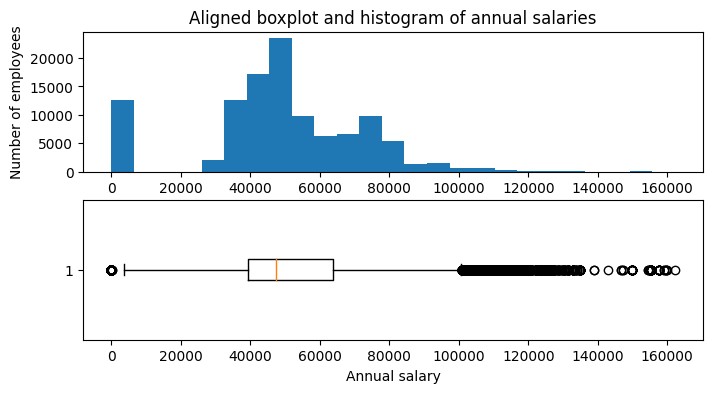

In [24]:
# B11:Inline(4/5)

fig = plt.figure(figsize = (8, 4))

#--- Your code starts here
ax = fig.add_subplot(2, 1, 1)
ax.hist(df['annual_salary'], bins = 25)
plt.ylabel('Number of employees')
plt.title('Aligned boxplot and histogram of annual salaries')

ax1 = fig.add_subplot(2, 1, 2)
ax1.boxplot(df['annual_salary'], vert=False)
_= plt.xlabel('Annual salary')


#--- Your code ends here

In [25]:
# B11:Inline(1/5)

# Reviewing this alignment of figures, are there actually
# low-paid outliers at the bottom or are they volunteers,
# i.e., have a categorically different relationship to 'wage'
print("Volunteer")

Volunteer


__B12.__ _(5 pts)_ Notice that while we know how much the employees earned in gross overtime, it's not entirely clear which individuals have actually _worked_ the most overtime hours. According to [a government guideline](https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/):

> Hourly rates of basic pay are computed by dividing an employee's annual rate of basic pay by 2087 hours.

So, using the assumption that overtime hours are payed out at $1.5$ times an employee's annual salary, complete the `add_overtime` function to compute the number of overtime hours worked by each employee in the dataset and store this in the dataframe under a new column called `'ytd_overtime_gross_hours'`. Be sure to handle remove any NAs or Infs from the result!

\[Hint. Assuming these individuals _do_ work full time hours, how many overtime hours _could_ an individual _actually_ work in a year?\] 

In [26]:
# B12:Function(3/5)

def add_overtime(df):

    #--- Your code starts here
    #df['hourly_rate'] = df['annual_salary']/2087
    #1.5*df['annual_salary']
    df['overtime_hours'] = (2087*df['ytd_overtime_gross'])/(1.5*df['annual_salary'])
    df = df.replace([np.inf, -np.inf], np.nan)



    #--- Your code ends here
    
    return df

When this is complete, print the `.head(10)` of your resulting dataframe on the following columns:

- `columns = ["annual_salary", "ytd_overtime_gross", "overtime_hours"]`

and sort by the new `"overtime_hours"` column in descending order. For reference, your output should look like:

```
        annual_salary  ytd_overtime_gross  overtime_hours
256043         3715.0            15373.20     5757.535828
202438         3715.0            13442.91     5034.608016
330139         3808.0             8884.70     3246.213043
277171         3715.0             8438.10     3160.217981
242361        47196.0            97221.21     2866.071493
113170         3607.0             7222.53     2785.956956
113697        47196.0            92005.08     2712.300505
324361         7459.0            13522.89     2522.435664
245009        47196.0            83196.27     2452.617672
242768        47310.0            82181.65     2416.868929
```

In [27]:
# B12:SanityCheck

df = add_overtime(df)
columns = ["annual_salary", "ytd_overtime_gross", "overtime_hours"]
print(df[columns].sort_values(by = 'overtime_hours', ascending = False).head(10))

        annual_salary  ytd_overtime_gross  overtime_hours
256043         3715.0            15373.20     5757.535828
202438         3715.0            13442.91     5034.608016
330139         3808.0             8884.70     3246.213043
277171         3715.0             8438.10     3160.217981
242361        47196.0            97221.21     2866.071493
113170         3607.0             7222.53     2785.956956
113697        47196.0            92005.08     2712.300505
324361         7459.0            13522.89     2522.435664
245009        47196.0            83196.27     2452.617672
242768        47310.0            82181.65     2416.868929


In [28]:
# B12:Inline(2/5)

# Consider that if not all employees are 'full time', that their computed
# overtime_hours will likely be incorrect, even if they gross overtime!
# So if some top-overtime-earning employees are 'part time', the results
# will not actually be a correct representation of how much overtime
# the different employees worked. Do you think the top employee's (df index 256043)
# calculated overtime hours are represented correctly or incorrectly?
print("Incorrect")

Incorrect


__B13.__ _(5 pts)_ Our overall interest may be to understand the `'annual_salaries'` column, and one avenue towards understanding this variable is through exploration of relationships with the others. So here's one question we might ask:
        
- Do employees who work overtime have higher salaries? If so how much?

To approach this question, complete the `compare_salary_overtime` function by making a scatter plot between these columns and labeling it with their correlation (using `scipy.stats.pearsonr` and rounding to two decimal places). Be sure to accomadate for density (use `alpha = 0.01` and marker size: `s = 3`) in the picture as you interpret. 

In [29]:
!pip install spicy


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [30]:
# B13:Function(3/5)

import scipy.stats

#print(scipy.stats.pearsonr(df['annual_salary'], df['ytd_overtime_gross']))

def compare_salary_overtime(df):
    fig = plt.figure(figsize = (6, 6))

    #--- Your code starts here
    correl = scipy.stats.pearsonr(df['annual_salary'], df['ytd_overtime_gross'])[0]
    #correl = '{:2f}'.format(correl)
    plt.scatter(df['annual_salary'], df['ytd_overtime_gross'], alpha=0.01, s = 3, color = 'black', label = 'Correlation: '+str(round(correl, 2)))

    #--- Your code ends here
    
    ## Set the tick and label fontsize
    plt.tick_params(labelsize = 13)

    ## Set the title and legend
    _ = plt.title("Annual salary vs. gross overtime pay", fontsize = 13)
    _ = plt.legend(fontsize = 13)

    ## Set the x,y-labels
    _ = plt.xlabel('Annual salary', fontsize = 13)
    _ = plt.ylabel("Gross overtime", fontsize = 13)
    
    return fig

When this is complete, discuss any relationship that you see (or don't) between the columns in the response box below. For reference, your output should look like:

![Expected Output](img/b13-expected-output.png)

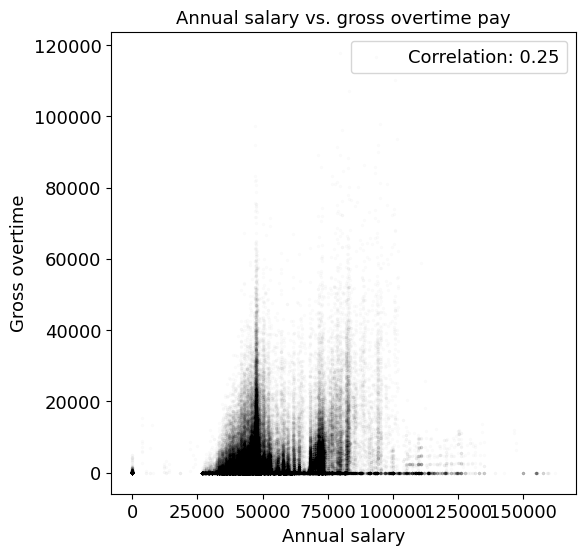

In [31]:
# B13:SanityCheck

fig = compare_salary_overtime(df)

In [32]:
# B13:Inline(2/5)

# Reviewing the output, do the high-outlier salary earners
# appear to be working more or less overtime than the non-outliers?
print("Less")

Less


__B14.__ _(5 pts)_ Now let's explore another hypothesis&mdash;that gender affects to pay. It will be good to  compare similarly-sized groups, so first group the rows by both `'gender'` and `'title'` to observe the gender ratios. 

In particular, use the `.groupby(column_list)` method to create generator of grouped rows. Using the `column_list = ['gender', 'title']` argument will allow extraction of two groups (one for each gender) with a matching `'title'`. 

In [33]:
# B14:Function(3/5)
def extract_comparison_groups(df, title):
    
    #--- Your code starts here
    grouped = df.groupby(['gender', 'title'])
    males = None
    females = None

    for name, group in grouped:
        if (name[0] == 'male') and (name[1] == title):
            males = group
        if (name[0] == 'female') and (name[1] == title):
            females = group

    
    
    #--- Your code ends here
    
    return males, females

Now, reviewing the results for the `'CORRECTIONAL OFFICER'` title, store the two resulting groups as `males` and `females` dataframes, and print the `.head()` of each. For reference, your output should look like:

```
      annual_salary  ytd_overtime_gross  overtime_hours
6851        40420.0             1744.89       60.062435
6949        41658.0             5376.59      179.572444
7025        46042.0             4702.67      142.108977
7067        45821.0             3668.93      111.405351
7094        40420.0             8146.82      280.429051
      annual_salary  ytd_overtime_gross  overtime_hours
6868        45711.0             2194.46       66.794105
6952        46042.0              862.20       26.054637
6986        45711.0             6016.95      183.141544
7007        46042.0             4430.94      133.897627
7055        40420.0             1761.84       60.645886
```

In [34]:
# B14:SanityCheck
title = "CORRECTIONAL OFFICER"

males, females = extract_comparison_groups(df, title)
        
print(females[columns].head())
print(males[columns].head())

      annual_salary  ytd_overtime_gross  overtime_hours
6851        40420.0             1744.89       60.062435
6949        41658.0             5376.59      179.572444
7025        46042.0             4702.67      142.108977
7067        45821.0             3668.93      111.405351
7094        40420.0             8146.82      280.429051
      annual_salary  ytd_overtime_gross  overtime_hours
6868        45711.0             2194.46       66.794105
6952        46042.0              862.20       26.054637
6986        45711.0             6016.95      183.141544
7007        46042.0             4430.94      133.897627
7055        40420.0             1761.84       60.645886


In [35]:
# B14:Inline(2/5)

# Reviewing the output, which of the two categories,
# male or femal, exhibits more employees earning 
# above $45,000 per year?
print("Male")

Male


__B15.__ (2 pts) determine if there is a difference between your male and female salaries on average. For reference, your output should look like:

```
females:  46594.41814439519 males:  46336.176814199054
```

In [36]:
# B15:Inline(1/2)

females_average = 0.
males_average = 0.

#--- Your code starts here
females_average = females['annual_salary'].mean()
males_average = males['annual_salary'].mean()


#--- Your code ends ehre

print('females: ', females_average, 'males: ', males_average)

females:  46594.41814439519 males:  46336.176814199054


In [37]:
# B15:Inline(1/2)

# Does it appear from the averages that there is a
# advantage to being male for a Correctional Officer's salary?
print("No")

No


__B16.__ (3 pts) That's a lot of work still to compare two means, and there's a lot of different titles to compare. Grouping `'gender'` against a single other `'title'` is just a comparison of `'gender'` against a single `'title'` category, as opposed to the generalization of comparing `'gender'` across _all_ of the categories in the `'title'` column for the `'annual_salary'` value. It turns out, `pandas` has some very convenient utility for this with the `pd.pivot_table()` function:

- ```df.pivot_table(columns = cols, aggfunc = aggfuncs)```

Here, `cols` will be our two categorical columns to compare and we'll use `aggfuncs = ['mean', 'std', 'count']`. Using this, apply the `pd.pivot_table()` function to the `'title'` and `'gender'` columns.

After you run the `pd.pivot_table()` function store the resulting dataframe as `avg_salary_gender_v_title`, and prinit/interpret the first two professions listed. Your output should look like:

```
title         ACCOUNT CLERK               ACCOUNTANT              
gender               female       male        female          male
annual_salary  37066.805755  37932.625  50256.363636  54909.823529 

title         ACCOUNT CLERK                ACCOUNTANT             
gender               female         male       female         male
annual_salary    1967.68908  1964.854325  4761.705402  8940.140503 

title         ACCOUNT CLERK      ACCOUNTANT     
gender               female male     female male
annual_salary           139   16         22   34 
```

In [38]:
# B16:Inline(2/3)

pivot_df = df[['annual_salary', 'title', 'gender']]
#--- Your code starts here
cols = ['title', 'gender']
aggfuncs = ['mean', 'std', 'count']
avg_salary_gender_v_title = pivot_df.pivot_table(columns = cols, aggfunc= aggfuncs)

#--- Your code ends here

print(avg_salary_gender_v_title['mean'].iloc[:,:4], "\n")
print(avg_salary_gender_v_title['std'].iloc[:,:4], "\n")
print(avg_salary_gender_v_title['count'].iloc[:,:4], "\n")

title         ACCOUNT CLERK               ACCOUNTANT              
gender               female       male        female          male
annual_salary  37066.805755  37932.625  50256.363636  54909.823529 

title         ACCOUNT CLERK                ACCOUNTANT             
gender               female         male       female         male
annual_salary    1967.68908  1964.854325  4761.705402  8940.140503 

title         ACCOUNT CLERK      ACCOUNTANT     
gender               female male     female male
annual_salary           139   16         22   34 



In [39]:
# B16:Inline(1/3)

# Reviewing the two positions, which appears to exhibit
# more of a gender impalance in annual_salary?
print("Accountant")

Accountant


__B17.__ (3 pts) Finally, your job here is to explore the of the 25 `'title'`s with largest difference in average pay between genders using `avg_salary_gender_v_title` dataframe.

Next, compute the `male - female` differences, by title and sort by absolute values. Since the `avg_salary_gender_v_title` object is multi-indexed by `(gender, title)` tuples, the collection of common `titles` that exhibit support from both genders has to be determined. Use this to construct an aligned `salary_differences` list which contains numerical `male - female` values for each title. Use this to sort a list of `(salary_difference, title)` tuples of from high-to-low by absolute value (use the `zip()` function within a `sorted()` operation). Note: you must still leave the differences unchanged (positive and negative values) by using the `key` argument to `sorted()` and a `lambda` function.

In [40]:
# B17:Inline(2/3)

male_titles = [x[0] for x in avg_salary_gender_v_title['mean'].columns if 'male' in x]
female_titles = [x[0] for x in avg_salary_gender_v_title['mean'].columns if 'female' in x]

titles = [x for x in set(male_titles + female_titles) 
          if (x, 'male') in avg_salary_gender_v_title['mean'].columns and
             (x, 'female') in avg_salary_gender_v_title['mean'].columns]

#--- Your code starts here
salary_differences = [(avg_salary_gender_v_title['mean'][(x, 'male')]-avg_salary_gender_v_title['mean'][(x, 'female')])[0] for x in titles]
salary_differences = sorted(zip(salary_differences, titles), key = lambda x: abs(x[0]), reverse=True)

#--- your code ends here

When complete, review your output for the `top_10` most disproportional titles. The outpus should be:

```
[(42760.0, 'LABOR,PROCUREMENT & LITIGATION ATTORNEY'),
 (-22430.79876160991, 'RECREATION ATTENDANT'),
 (-20169.318181818177, 'SENIOR ACCOUNTANT'),
 (17855.993788819876, 'CLERICAL ASSISTANT'),
 (13753.545454545456, 'PARKS OPERATIONS DIRECTOR'),
 (-11580.833333333332, 'GRADUATE INTERN'),
 (10389.63636363636, 'CHIEF FIRE EQUIPMENT DISPATCHER'),
 (-9821.546153846153, 'PARKS & RECREATION OPERATIONS MANAGER'),
 (-9776.0, 'ADMINISTRATIVE TRAINEE 2'),
 (9180.199999999997, 'ACCOUNTING SUPERVISOR')]
```

In [41]:
# B17:SanityCheck

top_10 = salary_differences[:10]
top_10

[(42760.0, 'LABOR,PROCUREMENT & LITIGATION ATTORNEY'),
 (-22430.79876160991, 'RECREATION ATTENDANT'),
 (-20169.318181818177, 'SENIOR ACCOUNTANT'),
 (17855.993788819876, 'CLERICAL ASSISTANT'),
 (13753.545454545456, 'PARKS OPERATIONS DIRECTOR'),
 (-11580.833333333332, 'GRADUATE INTERN'),
 (10389.63636363636, 'CHIEF FIRE EQUIPMENT DISPATCHER'),
 (-9821.546153846153, 'PARKS & RECREATION OPERATIONS MANAGER'),
 (-9776.0, 'ADMINISTRATIVE TRAINEE 2'),
 (9180.199999999997, 'ACCOUNTING SUPERVISOR')]

In [42]:
# B17:Inline(1/3)

# Which title most disproportionately favors females.
# Choose one of: 'GRADUATE INTERN', 'ACCOUNTING SUPERVISOR', or 'CLERICAL ASSISTANT'
print("GRADUATE INTERN")

GRADUATE INTERN


__B18.__ _(2 pts)_ Finally, take your `top_10` largest-difference `'title'`s and display them using a side-by-side barplot. To conveniently do this, we can use the `.plot(kind = 'bar')` on a data frame with `male` and `female` columns, with the average salary for each in each row. Name this dataframe `bar_df` and print the its head to review. For reference, this should look like:
```
                                                  male        female
LABOR,PROCUREMENT & LITIGATION ATTORNEY  116860.000000  74100.000000
RECREATION ATTENDANT                       4708.411765  27139.210526
SENIOR ACCOUNTANT                         54983.000000  75152.318182
CLERICAL ASSISTANT                        23797.428571   5941.434783
PARKS OPERATIONS DIRECTOR                108890.363636  95136.818182
```

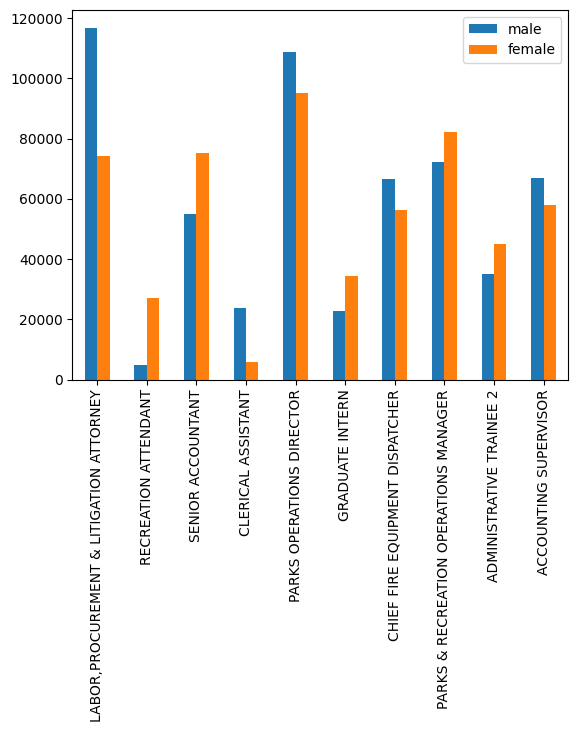

In [48]:
# B18:Inline(1/2)

# gather the top-10 most disproportional salaries
male_salaries = [avg_salary_gender_v_title['mean'][(x[1], 'male')] for x in top_10]
female_salaries = [avg_salary_gender_v_title['mean'][(x[1], 'female')] for x in top_10]

#--- Your code starts here
salaries_dict = {}
for i in range(len(male_salaries)):
    title = male_salaries[i].name[0]
    salaries_dict[title] = {'male': male_salaries[i][0], 'female': female_salaries[i][0]}

# create a DataFrame from the dictionary
bar_df = pd.DataFrame(salaries_dict).T

# plot the bar chart
bar_df.plot(kind='bar')
plt.show()

#--- Your code ends here


Now utilize the dataframe you've constructed to make a grouped bar plot exhibiting the average salaries for the top ten most disporportionate positions.

In particular, use the dataframe `.plot()` method, since this `pandas` method for a barplot is really just wrapping `matplotlib`'s `pyplot`. This means we can use `pyplot`/`matpltlib` (proper) commands for many things like the `plt.title()`, but to make the figure size nice we have the pass the `figsize=(x_inches,y_inches)` argument to the dataframe `.plot()` method. So, as is necessary make this visualization look nice to ease your discussion (above)!

For reference, your output should be:

![Expected Output](img/b18-expected-output.png)

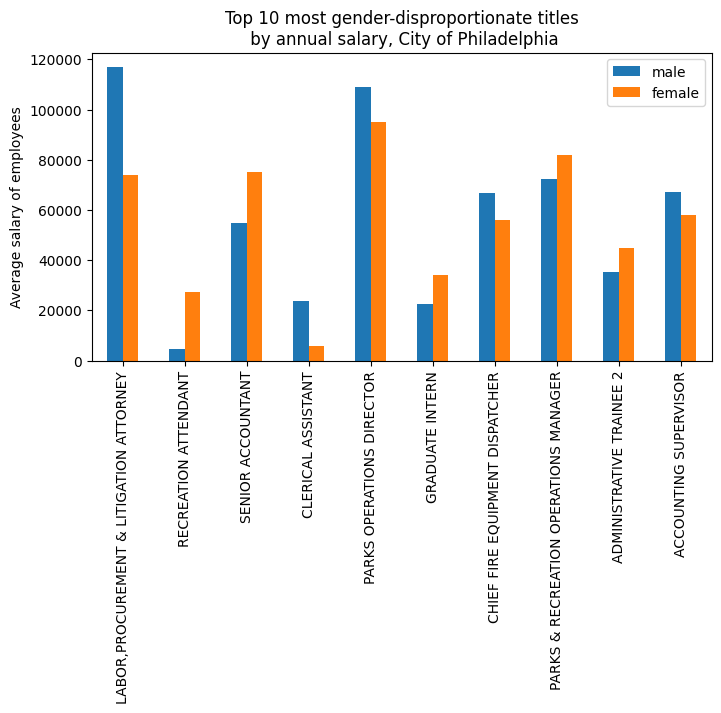

In [49]:
# B18:SanityCheck

bar_df.plot(kind = 'bar', figsize=(8,4))

_ = plt.ylabel('Average salary of employees')
_ = plt.title('Top 10 most gender-disproportionate titles\n by annual salary, City of Philadelphia')

In [50]:
# B18:Inline(1/2)

# Upon reviewing your output, consider if all positions with large gender-based differences
# appear to reflect full-time positions, and hence disproportionality. In particular, 
# assume low annual wages reflect part-time work. 
# Finally, considering this does the `'RECREATION ATTENDANT'` position
# likely exhibit an undue social gender imbalance?

print("No")

No
